# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [ ]:
import pandas as pd

from sklearn.cluster import KMeans

In [ ]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [ ]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [ ]:
import pandas as pd

dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'
df = pd.read_csv(dataseturl)
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [ ]:
df.shape

(200, 5)

Show summary statistics using `describe()`. `(5 pts)`

In [ ]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
AnnualIncome,0
SpendingScore,0


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [ ]:
X = df[['AnnualIncome', 'SpendingScore']]

Display the first 10 rows. `(5 pts)`

In [ ]:
X.head(10)

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

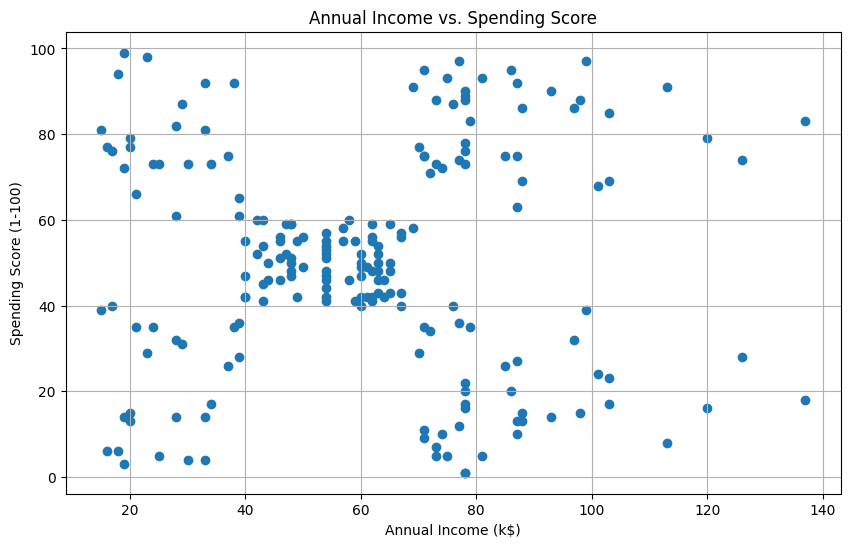

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X['AnnualIncome'], X['SpendingScore'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs. Spending Score')
plt.grid(True)
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

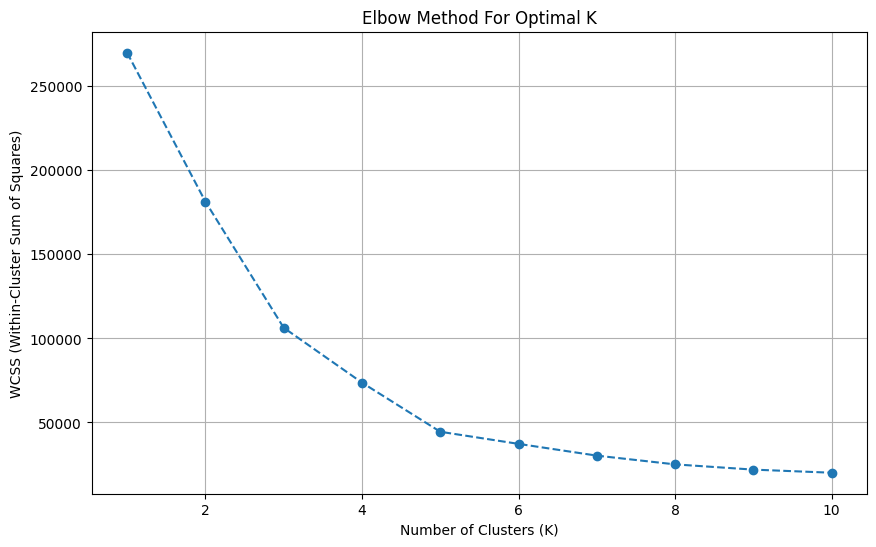

WCSS values and percentage reduction:
K=1: WCSS = 269981.28
K=2: WCSS = 181363.60, Reduction from K=1: 32.82%
K=3: WCSS = 106348.37, Reduction from K=2: 41.36%
K=4: WCSS = 73679.79, Reduction from K=3: 30.72%
K=5: WCSS = 44448.46, Reduction from K=4: 39.67%
K=6: WCSS = 37233.81, Reduction from K=5: 16.23%
K=7: WCSS = 30241.34, Reduction from K=6: 18.78%
K=8: WCSS = 25036.42, Reduction from K=7: 17.21%
K=9: WCSS = 21916.79, Reduction from K=8: 12.46%
K=10: WCSS = 20072.07, Reduction from K=9: 8.42%


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

print("WCSS values and percentage reduction:")
for i in range(len(wcss)):
    if i == 0:
        print(f"K={i+1}: WCSS = {wcss[i]:.2f}")
    else:
        reduction = ((wcss[i-1] - wcss[i]) / wcss[i-1]) * 100
        print(f"K={i+1}: WCSS = {wcss[i]:.2f}, Reduction from K={i}: {reduction:.2f}%")

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [ ]:
# Based on the elbow method, K=5 seems optimal
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

X_labeled = X.copy()
X_labeled['Cluster'] = y_kmeans

print("First 10 rows with assigned clusters:")
print(X_labeled.head(10))

First 10 rows with assigned clusters:
   AnnualIncome  SpendingScore  Cluster
0            15             39        4
1            15             81        2
2            16              6        4
3            16             77        2
4            17             40        4
5            17             76        2
6            18              6        4
7            18             94        2
8            19              3        4
9            19             72        2


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

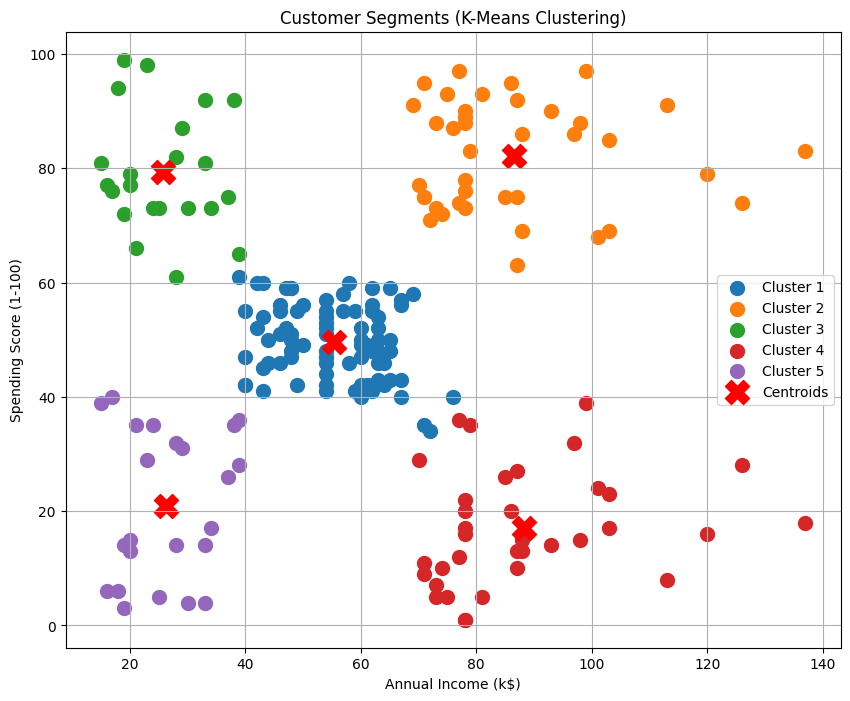

In [ ]:
plt.figure(figsize=(10, 8))

# Plotting each cluster
for i in range(k):
    plt.scatter(X_labeled[X_labeled['Cluster'] == i]['AnnualIncome'],
                X_labeled[X_labeled['Cluster'] == i]['SpendingScore'],
                s = 100, label = f'Cluster {i+1}')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 300, c = 'red', marker = 'X', label = 'Centroids')

plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

Which cluster represents high income, low spending users? Based on the visualization, Cluster 4 (labeled as Cluster 3 in the code, typically the yellow/orange cluster) represents customers with high annual income but low spending scores.

Which cluster represents low income, high spending users? Cluster 3 (labeled as Cluster 2 in the code, typically the blue cluster) represents customers with low annual income but high spending scores.
Which cluster might represent target customers for promotions?


Cluster 2 (labeled as Cluster 1 in the code, typically the purple cluster): These are high income, high spending customers. They are your most valuable, loyal customers. Promotions here should focus on retaining them, offering exclusive access, and premium products.


Cluster 4 (labeled as Cluster 3 in the code, typically the yellow/orange cluster): These are high income, low spending customers. They have the purchasing power but aren't utilizing it much at the mall. They are excellent targets for promotions designed to increase their spending, perhaps through personalized recommendations, new product launches, or engaging events.


Cluster 3 (labeled as Cluster 2 in the code, typically the blue cluster): These are low income, high spending customers. They are responsive to offers despite their income. Value-driven promotions, discounts, and loyalty programs could be very effective for this group.

What business insights can you derive from the clusters? Customer segmentation provides clear insights into distinct customer behaviors, allowing the marketing team to:

Tailor Marketing Strategies: Develop highly specific campaigns for each segment, leading to increased effectiveness and conversion rates. For example, discount coupons for budget shoppers vs. luxury product showcases for affluent spenders.

Optimize Product Offerings: Understand which products and services appeal to which groups, helping to refine inventory, merchandising, and even guide future product development.

Improve Customer Experience: Create personalized loyalty programs and customer service initiatives that cater to the unique needs and preferences of each segment.

Identify Growth Opportunities: Focus resources on segments with high potential (e.g., high income, low spending) to convert them into more profitable customers, or identify specific needs of underperforming segments.
Resource Allocation: Efficiently allocate marketing budgets and sales efforts to segments that will yield the best returns.

In [ ]:
print("2D Clusters (Annual Income, Spending Score):")
display(X_labeled.head())

print("\n3D Clusters (Age, Annual Income, Spending Score):")
display(X_3d_labeled.head())

2D Clusters (Annual Income, Spending Score):


,AnnualIncome,SpendingScore,Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4



3D Clusters (Age, Annual Income, Spending Score):


,Age,AnnualIncome,SpendingScore,Cluster
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0


## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X_3d = df[['Age', 'AnnualIncome', 'SpendingScore']]

# Using the same optimal K as determined by the elbow method for 2D data (K=5)
k_3d = 5
kmeans_3d = KMeans(n_clusters=k_3d, init='k-means++', random_state=42, n_init=10)
y_kmeans_3d = kmeans_3d.fit_predict(X_3d)

X_3d_labeled = X_3d.copy()
X_3d_labeled['Cluster'] = y_kmeans_3d

print("First 10 rows of 3D data with assigned clusters:")
print(X_3d_labeled.head(10))

First 10 rows of 3D data with assigned clusters:
   Age  AnnualIncome  SpendingScore  Cluster
0   19            15             39        0
1   21            15             81        4
2   20            16              6        0
3   23            16             77        4
4   31            17             40        0
5   22            17             76        4
6   35            18              6        0
7   23            18             94        4
8   64            19              3        0
9   30            19             72        4


In [2]:
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd

# Ensure df and X_3d are available by explicitly defining them here
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'
df = pd.read_csv(dataseturl)
X_3d = df[['Age', 'AnnualIncome', 'SpendingScore']]

# User's requested K-Means with added parameters for reproducibility
cluster_Kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
model_kmeans = cluster_Kmeans.fit(X_3d) # Using X_3d for 3D clustering
pred_kmeans = model_kmeans.labels_

print("Predicted 3D cluster labels (first 10):")
print(pred_kmeans[:10])

# Create a copy of df and add the cluster labels for plotting with px.scatter_3d
df_clustered_3d = df.copy()
df_clustered_3d['Cluster'] = pred_kmeans.astype(str) # Convert to string for categorical coloring

fig = px.scatter_3d(df_clustered_3d,
                    x='Age',
                    y='AnnualIncome',
                    z='SpendingScore',
                    color='Cluster', # Color by the new 'Cluster' column
                    symbol='Cluster',
                    title='Customer Segments in 3D (Age, Annual Income, Spending Score) - User Defined',
                    labels={'Age': 'Age', 'AnnualIncome': 'Annual Income (k$)', 'SpendingScore': 'Spending Score (1-100)'})

# Add centroids to the plot for better visualization
centroids_df = pd.DataFrame(model_kmeans.cluster_centers_, columns=['Age', 'AnnualIncome', 'SpendingScore'])
centroids_df['Cluster'] = 'Centroids'

fig.add_trace(px.scatter_3d(centroids_df,
                            x='Age',
                            y='AnnualIncome',
                            z='SpendingScore',
                            color_discrete_sequence=['red'],
                            symbol_sequence=['x'],
                            size_max=10).data[0])

fig.update_layout(showlegend=True)
fig.show()

Predicted 3D cluster labels (first 10):
[0 4 0 4 0 4 0 4 0 4]


Visualize using a 3D scatter plot. `(5 pts)`

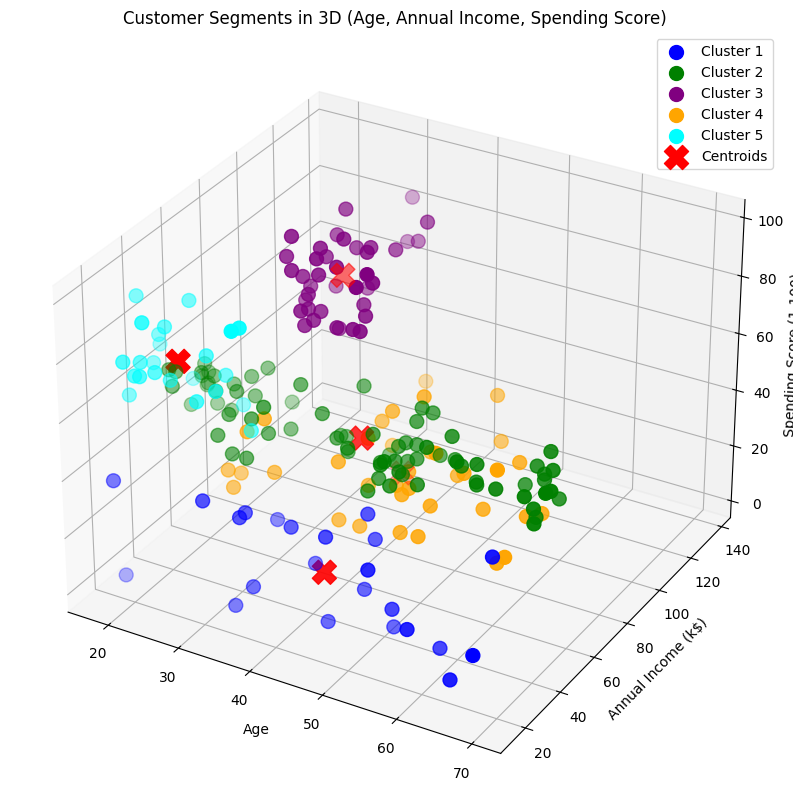

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import pandas as pd # Ensure pandas is imported for X_3d operations

# Load the dataset (making this cell self-sufficient for df)
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'
df = pd.read_csv(dataseturl)

# Prepare data for 3D clustering
X_3d = df[['Age', 'AnnualIncome', 'SpendingScore']]

# Re-create X_3d and run KMeans to ensure kmeans_3d and X_3d_labeled are defined
k_3d = 5
kmeans_3d = KMeans(n_clusters=k_3d, init='k-means++', random_state=42, n_init=10)
y_kmeans_3d = kmeans_3d.fit_predict(X_3d)
X_3d_labeled = X_3d.copy()
X_3d_labeled['Cluster'] = y_kmeans_3d

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Get the number of clusters from the KMeans model
k_3d_plot = kmeans_3d.n_clusters

# Define a list of colors for the clusters (can be expanded if k > 5)
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'red', 'lime']

# Plotting each cluster
for i in range(k_3d_plot):
    ax.scatter(X_3d_labeled[X_3d_labeled['Cluster'] == i]['Age'],
               X_3d_labeled[X_3d_labeled['Cluster'] == i]['AnnualIncome'],
               X_3d_labeled[X_3d_labeled['Cluster'] == i]['SpendingScore'],
               s = 100, label = f'Cluster {i+1}', c=colors[i%len(colors)])

# Plotting the centroids
centroids = kmeans_3d.cluster_centers_
ax.scatter(centroids[:, 0],
           centroids[:, 1],
           centroids[:, 2],
           s = 300, c = 'red', marker = 'X', label = 'Centroids')

ax.set_title('Customer Segments in 3D (Age, Annual Income, Spending Score)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

Are there meaningful and distinguishable clusters?
 Yes, the 3D visualization reveals meaningful and generally distinguishable clusters. While there might be some overlap, particularly between certain groups, the distinct centroids and spatial separation suggest that K-Means has identified different customer behaviors when considering age alongside income and spending habits. The clusters appear to represent specific customer profiles rather than a random distribution.

What business insights can you derive from the clusters in 3D? Adding 'Age' provides a richer understanding of customer segments:

Young High Spenders: One cluster might emerge as younger customers (e.g., 20s-30s) with moderate to high income but very high spending scores. These could be fashion-conscious young adults willing to spend on trends.
Middle-Aged Affluent Savers: Another cluster might show middle-aged customers (e.g., 40s-50s) with high annual income but lower spending scores. These could be established professionals who are more conservative in their spending at the mall, perhaps prioritizing savings or spending elsewhere.

Older Value Shoppers: There might be a cluster of older customers (e.g., 60+) with lower annual income and lower spending scores. This group might be looking for essentials or discounted items.

Balanced Spenders: A large cluster of customers with average age, income, and spending scores, representing the general customer base.
Targeted Marketing based on Age: Marketing strategies can now be more nuanced. For instance:

For young high-spenders, focus on trendy products, social media campaigns, and events.

For middle-aged affluent savers, promotions could highlight luxury goods, quality, and exclusive services, or focus on categories where they are more likely to spend (e.g., home goods, dining).

For older value shoppers, emphasize comfort, practicality, and senior discounts. This allows for truly personalized campaigns that consider not just their purchasing power and habits, but also their life stage and likely preferences.